In [4]:
%matplotlib inline
import blimpy
import pylab as plt
from blimpy import Waterfall
from blimpy import calcload
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import time
from scipy.stats import norm, kurtosis, kurtosistest
import numpy.ma as ma

In [7]:
file_path = '/lustre/aoc/students/jsofair/playing-with-cosmic-data/filterbank/'
filelist = glob.glob(os.path.join(file_path,'*.fil'))

ml_list = []
for i, file in enumerate(filelist):
    ml = blimpy.calcload.calc_max_load(os.path.join(file))
    ml_list.append(ml)
    print(f'{ml} -- {file[65:]}')

9.0 -- Band_Test_BD_C512-beam0001.fil
8.0 -- band_test_AC_C512-beam0001.fil
11.0 -- Band_Test_BD_C0-beam0001.fil
7.0 -- band_test_GPU3_BD_C32-beam0001.fil
11.0 -- band_test_AC_C32-beam0001.fil
4.0 -- band_test_AC_C544-beam0001.fil


In [8]:
t0 = time.time()
water0 = Waterfall(os.path.normpath(filelist[0]), max_load = ml_list[0])

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 12.965437412261963


In [ ]:
water0 = Waterfall(os.path.normpath(filelist[0]), max_load = ml_list[0])
water1 = Waterfall(os.path.normpath(filelist[1]), max_load = ml_list[1])
water2 = Waterfall(os.path.normpath(filelist[2]), max_load = ml_list[2])
water3 = Waterfall(os.path.normpath(filelist[3]), max_load = ml_list[3])
water4 = Waterfall(os.path.normpath(filelist[4]), max_load = ml_list[4])
water5 = Waterfall(os.path.normpath(filelist[5]), max_load = ml_list[5])

water_list = [water0, water1, water2, water3, water4, water5]

In [16]:
water4 = Waterfall(os.path.normpath(filelist[4]), max_load = ml_list[4])

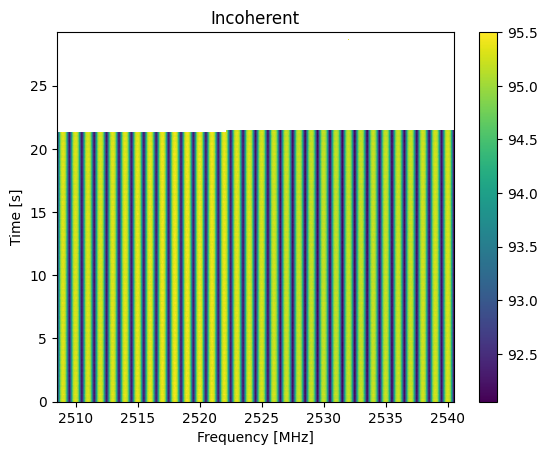

In [20]:
water5.plot_waterfall()

extracting integration 0...


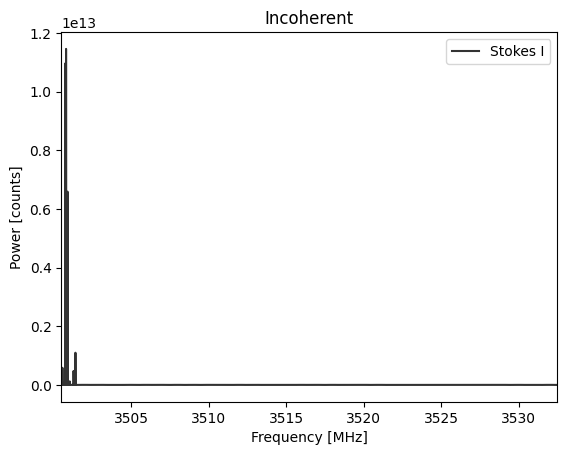

In [24]:
water0.plot_spectrum()

In [5]:
obs = Waterfall(os.path.join(file_path,'band_test_AC_C32-beam0001.fil'))
obs.info()
obs.plot_spectrum(logged=True, f_start=2000,f_stop=2005)
plt.figure()
obs.plot_waterfall(f_start=2000,f_stop=2005)
# print(obs.header)
# print(obs.data.shape)

# obs.plot_spectrum()


--- File Info ---
      machine_id :                                0
    telescope_id :                               -1
         src_raj :                 4:09:22.00873993
         src_dej :                12:17:39.84749624
        az_start :             6.9397794901351e-310
        za_start :             4.6720091597949e-310
       data_type :                                1
            fch1 :           2028.4999961853027 MHz
            foff :           -7.62939453125e-06 MHz
          nchans :                          4194304
          nbeams :                                2
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2023-05-10T21:56:53.857
    tstart (MJD) :                60074.91451223567
           tsamp :                         0.131072
            nifs :                                1
     barycentric :                                1
   pulsarcentric :                           

In [6]:
len(filelist)

6

In [7]:
print(filelist)
os.path.normpath(filelist[0])

['/lustre/aoc/students/jsofair/filterbank/Band_Test_BD_C512-beam0001.fil', '/lustre/aoc/students/jsofair/filterbank/band_test_AC_C512-beam0001.fil', '/lustre/aoc/students/jsofair/filterbank/Band_Test_BD_C0-beam0001.fil', '/lustre/aoc/students/jsofair/filterbank/band_test_GPU3_BD_C32-beam0001.fil', '/lustre/aoc/students/jsofair/filterbank/band_test_AC_C32-beam0001.fil', '/lustre/aoc/students/jsofair/filterbank/band_test_AC_C544-beam0001.fil']


'/lustre/aoc/students/jsofair/filterbank/Band_Test_BD_C512-beam0001.fil'

In [8]:
water0.info()


--- File Info ---
      machine_id :                                0
    telescope_id :                               -1
         src_raj :                 4:09:22.00873993
         src_dej :                12:17:39.84749624
        az_start :             6.9287069824102e-310
        za_start :             4.6633787335631e-310
       data_type :                                1
            fch1 :           3532.4999961853027 MHz
            foff :           -7.62939453125e-06 MHz
          nchans :                          4194304
          nbeams :                                2
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2023-05-10T22:08:42.502
    tstart (MJD) :               60074.922714145854
           tsamp :                         0.131072
            nifs :                                1
     barycentric :                                1
   pulsarcentric :                           

In [16]:
# Observation date: 5/10/2023
times = [] 
for file in water_list:
    time_mjd = Time(file.header['tstart'], format='mjd')
    time_ymdhms = (time_mjd.to_value('ymdhms'))
    time_ymdhms_formatted = f"{time_ymdhms[0]}-{time_ymdhms[1]}-{time_ymdhms[2]}T{time_ymdhms[3]}:{time_ymdhms[4]}:{time_ymdhms[5]}"
    times.append(time_ymdhms_formatted)

print(times)

# print(times[0] == times[1])
# print(times[2] == times[3])
# print(times[2] == times[4])

# for i in water0.header.values():
#     if water0.header.values[i] != water0.header.values[i]:
#         print(water0.header[i])
#         print(water1.header[i])


['2023-5-10T22:8:42.502201796', '2023-5-10T22:8:42.502201796', '2023-5-10T21:56:53.857161999', '2023-5-10T21:56:53.857161999', '2023-5-10T21:56:53.857161999', '2023-5-10T22:8:42.502201796']


In [10]:
water0_abr = Waterfall(os.path.normpath(filelist[0]), max_load = ml_list[0], f_start = 3514, f_stop=3517)

In [11]:
plt.figure()
water0_abr.plot_all()

Plotting Min Max
averaging along time axis...
Plotting Spectrum
extracting integration 0...
Plotting Waterfall
Plotting Timeseries
Plotting Kurtosis


/lustre/aoc/students/jsofair/jnrao/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Plotting Header


In [12]:
t0 = time.time()

plt.figure()
water0_abr.plot_all()

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Plotting Min Max
averaging along time axis...
Plotting Spectrum
extracting integration 0...
Plotting Waterfall
Plotting Timeseries
Plotting Kurtosis
Plotting Header
Elapsed time: 7.738856315612793


In [13]:
water0_abr2 = Waterfall(os.path.normpath(filelist[0]), max_load = ml_list[0], f_start = 3501, f_stop=3506)

In [14]:
t0 = time.time()

water0_abr2.plot_kurtosis()
plt.ylim([3,6])
plt.figure()
plt.show()

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

/lustre/aoc/students/jsofair/jnrao/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1203: RuntimeWarning: overflow encountered in square
  s = s**2


Elapsed time: 9.312691926956177


---
**Self-made kurtosis plot(s)?** Here's my plan:
- Break up waterN.freqs into channels of width w
- Calculate the kurtosis of each channel
- Create an array that contains all channels with kurtosis > 0 (the Fisher definition is used by default)
- Compare these channels with Dept. of Commerce graph to see where RFI might be coming in
- Will also compare to waterN+1.freqs, etc. to see common threads to identify RFI

**Step 1:** Break up waterN.freqs into channels of width w

In [17]:
print(water0)
min_f = int(np.round(water0.freqs[len(water0.freqs)-1]))
max_f = int(np.round(water0.freqs[0]))

'''
For now, this is all just using water0. Eventually, I want this to hit the point
where it will go through all N of the .fil files
'''

# Create an array of channel borders for each .fil file
all_channels = []

for i in range(0, len(water_list)):
    exec(f'water{i}_channels = []')
    exec(f'all_channels.append(water{i}_channels)')


    
print(max_f, min_f)
# Add channel divisions to an array
for j in enumerate(range(min_f, max_f, 5)):
    freq = j[1]
    exec(f'water{0}_channels.append(freq)')
    


# for i, freq in enumerate(range(0, len(water_list))):
#     for j in enumerate(range(min_f, max_f, 10)):
#         print(freq)
#         exec(f'water{i}_channels.append(freq)')

# for i, freq in enumerate(range(0, len(water_list))):
#     for j in enumerate(range(min_f, max_f, 10)):

print(all_channels)
print(water0_channels)

Waterfall data: /lustre/aoc/students/jsofair/filterbank/Band_Test_BD_C512-beam0001.fil


AttributeError: 'Waterfall' object has no attribute 'freqs'

**Step 2:** Calculate the kurtosis of each channel

In [ ]:
# Grouping channels
# chnl = water0.freqs[div[i-1]:div[i]]

# print(water0.freqs[0:2])


def channel_kurtosis(arr, min, max):
    chnl = ma.masked_outside(arr, min, max)
    return kurtosis(chnl)


for i, j in enumerate(range(0, len(all_channels[0]))):
    exec(f'channel_kurtosis(water{i}.freqs, min_f, max_f)')

channel_kurtosis(water0.freqs, 3501, 3506)

In [ ]:
# i = 0 # i goes through the waterN
# j = 0 # j goes through the elements of the waterN borders
# while i <= len(water0.freqs)-2:
#     chnl = ma.masked_outside(water0.freqs, all_channels[i][j], all_channels[i][j+1])
#     print(chnl)
#     i += 2
#     j += 1
print(ma.masked_outside(water0.freqs, 3501, 3506))
print(kurtosis(ma.masked_outside(water0.freqs, 3501, 3506)))

# indeces = np.where((water0.freqs > 3501) & (water0.freqs < 3506))
a = water0.freqs[indeces]
print(kurtosis(a), kurtosistest(a))
print(a, len(a))
len(water0.freqs)

In [ ]:
water0_abr2.plot_kurtosis(f_start=3501, f_stop=3506)
plt.figure()

In [ ]:
# print(all_channels[0][0], all_channels[0][1])

# chnl = water0.freqs
# print(chnl)
# for i, water in enumerate(all_channels):
#     for j, div in enumerate(water0.freqs):
#         print(div)
#         chnl = water[0:div]
#         print(chnl)

**Step 3:** Create an array that contains all channels with kurtosis > 0 (the Fisher definition is used by default)

**Step 4:** Compare these channels with Dept. of Commerce graph to see where RFI might be coming in

**Step 5:** Will also compare to waterN+1.freqs, etc. to see common threads to identify RFI

---

In [ ]:
# kurtosis(water0.freqs)
water0.freqs

In [ ]:
print(filelist[0][40:])
plt.figure()
water0.plot_waterfall(vmin=90, vmax=100)

In [ ]:
print(filelist[1][40:])
plt.figure()
water1.plot_waterfall(vmin=90, vmax=100)

In [ ]:
print(filelist[2][40:])
plt.figure()
water2.plot_waterfall()

In [ ]:
water3.info()

In [ ]:
print(filelist[3][40:])
plt.figure()
water3.plot_waterfall()

In [ ]:
print(filelist[4][40:])
plt.figure()
water4.plot_waterfall()

In [ ]:
print(filelist[5][40:])
plt.figure()
water5.plot_waterfall()

In [ ]:
# print(np.max(water0.freqs), np.min(water0.freqs))
water0.freqs

In [ ]:
water0.plot_spectrum(t=0,f_start=3500,f_stop=3502)

^^ Interesting...? Seems like there's nothing there except in the ~3500-3501.5 MHz range

In [ ]:
water1.freqs

In [ ]:
water1.plot_spectrum(f_start=2476, f_stop=2478)

In [ ]:
water2.freqs

In [ ]:
water2.plot_spectrum()

In [ ]:
water3.freqs

In [ ]:
water3.plot_spectrum()

In [ ]:
water4.freqs

In [ ]:
water4.plot_spectrum()

In [ ]:
water5.freqs

In [ ]:
water5.plot_spectrum()

In [ ]:
data_test = water5.data
print(data_test.shape)
test_mean = np.mean(data_test, axis=0)
print(test_mean, len(test_mean[0]))
test_mean0 = test_mean[0]
print(test_mean0.shape)
print(test_mean0)

In [ ]:
# plt.xlim([2510,2515])
plt.ylim([0,0.5*10**11])
plt.plot(water5.freqs, test_mean0)

In [ ]:
water5.plot_histogram()